In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('0', '0', '1', '0', '0', '0', '1', '0')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ A ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xncs_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=100)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 3
explore = 2000
exploit = 500

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0, # explore,
             exploit_trials=exploit + explore,
             pre_generate=True
           )

df_other = XNCSExp(
    maze=maze,
    cfg=XNCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.2710486000000003, 'population': 1494, 'numerosity': 1600, 'average_specificity': 7.789375}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1158.2183271550452, 'perf_time': 0.06356459999999942, 'population': 900, 'numerosity': 1600, 'average_specificity': 6.43125}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 71, 'reward': 1000.0000000275006, 'perf_time': 0.4300088000000031, 'population': 850, 'numerosity': 1600, 'average_specificity': 5.973125}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 11, 'reward': 1023.1122292121702, 'perf_time': 0.077508899999998, 'population': 791, 'numerosity': 1600, 'average_specificity': 6.88}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 61, 'reward': 1000.000000865112, 'perf_time': 0.3234722999999917, 'population': 797, 'numerosity': 1600, 'average_specificity': 6.780625}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_tri

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.179087399999986, 'population': 1491, 'numerosity': 1600, 'average_specificity': 8.620625}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 7, 'reward': 1097.3862870497821, 'perf_time': 0.09056069999996907, 'population': 1085, 'numerosity': 1600, 'average_specificity': 7.23125}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 9, 'reward': 1000.0000000000001, 'perf_time': 0.06897590000005493, 'population': 892, 'numerosity': 1600, 'average_specificity': 6.675}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 5, 'reward': 1227.0237951693728, 'perf_time': 0.01829409999999143, 'population': 866, 'numerosity': 1600, 'average_specificity': 7.424375}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 9, 'reward': 1056.6759190834005, 'perf_time': 0.07393160000003718, 'population': 781, 'numerosity': 1600, 'average_specificity': 6.523125}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 91, 'reward': 1000.0, 'perf_time': 1.095884300000023, 'population': 1515, 'numerosity': 1600, 'average_specificity': 8.685}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1180.4229351000113, 'perf_time': 0.026216400000066642, 'population': 1062, 'numerosity': 1600, 'average_specificity': 7.4875}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 6, 'reward': 1131.3715399700018, 'perf_time': 0.03167529999996077, 'population': 930, 'numerosity': 1600, 'average_specificity': 7.179375}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 11, 'reward': 1023.1122292121702, 'perf_time': 0.10280869999996867, 'population': 882, 'numerosity': 1600, 'average_specificity': 6.610625}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 5, 'reward': 1195.3400283078952, 'perf_time': 0.05024909999997362, 'population': 823, 'numerosity': 1600, 'average_specificity': 5.84125}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_i

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.7359029000000419, 'numerosity': 1600, 'population': 1509, 'average_specificity': 7.898125, 'fraction_accuracy': 0.99}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 9, 'reward': 1046.1267667462541, 'perf_time': 0.08384309999996731, 'numerosity': 1600, 'population': 1081, 'average_specificity': 6.18875, 'fraction_accuracy': 0.95}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 67, 'reward': 1000.0000001277459, 'perf_time': 0.595331500000043, 'numerosity': 1600, 'population': 977, 'average_specificity': 6.701875, 'fraction_accuracy': 0.96}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 15, 'reward': 1005.908325694025, 'perf_time': 0.1900277999999389, 'numerosity': 1600, 'population': 1003, 'average_specificity': 6.464375, 'fraction_accuracy': 0.96}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 11, 'reward': 1025.166530254844, 'perf_time': 0.08777309999993577, 'numerosi

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.4861783000001196, 'numerosity': 1600, 'population': 1489, 'average_specificity': 7.810625, 'fraction_accuracy': 0.98}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1257.740048608998, 'perf_time': 0.03932069999996202, 'numerosity': 1600, 'population': 1131, 'average_specificity': 7.01, 'fraction_accuracy': 0.95}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 7, 'reward': 1137.3918298582194, 'perf_time': 0.08498740000004545, 'numerosity': 1600, 'population': 1083, 'average_specificity': 7.31125, 'fraction_accuracy': 0.86}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 10, 'reward': 1036.9277421157428, 'perf_time': 0.09687030000009145, 'numerosity': 1600, 'population': 1103, 'average_specificity': 8.096875, 'fraction_accuracy': 0.94}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 6, 'reward': 1164.061511166543, 'perf_time': 0.08005529999991268, 'numerosity

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.4727439999999206, 'numerosity': 1600, 'population': 1520, 'average_specificity': 8.51375, 'fraction_accuracy': 0.96}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 14, 'reward': 1009.6286465655041, 'perf_time': 0.26807240000016463, 'numerosity': 1600, 'population': 1165, 'average_specificity': 7.105, 'fraction_accuracy': 0.97}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 27, 'reward': 1000.0980338979363, 'perf_time': 0.2835891999998239, 'numerosity': 1600, 'population': 1108, 'average_specificity': 7.7, 'fraction_accuracy': 1.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1492.2401954617194, 'perf_time': 0.018526300000075935, 'numerosity': 1600, 'population': 1119, 'average_specificity': 7.786875, 'fraction_accuracy': 0.92}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 100, 'reward': 1.8066542666571946e-27, 'perf_time': 1.0157960000001367, 'numeros

In [5]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other
trial,,,,,,,,,,,
0,97.000000,333.333333,1.182007,1500.000000,1600.0,8.365000,100.000000,1506.000000,1600.0,8.074167,0.976667
100,45.666667,717.675308,0.331375,1116.666667,1600.0,7.261250,3.333333,1186.333333,1600.0,6.865208,0.903333
200,6.000000,1145.342516,0.060114,1015.666667,1600.0,7.050000,9.000000,1125.666667,1600.0,6.767917,0.956667
300,7.666667,1116.691724,0.075114,966.666667,1600.0,6.519167,5.666667,1094.666667,1600.0,6.851042,0.950000
400,10.000000,1088.676388,0.048711,917.000000,1600.0,6.826250,4.000000,1082.333333,1600.0,6.908958,0.800000
500,28.666667,1043.790513,0.176887,890.666667,1600.0,6.609167,33.666667,1056.000000,1600.0,7.237708,0.940000
600,7.333333,1118.731469,0.075750,865.666667,1600.0,6.652917,7.000000,1059.333333,1600.0,7.095417,0.983333
700,9.000000,1091.082751,0.066204,846.333333,1600.0,6.971667,9.333333,1075.000000,1600.0,7.449375,0.940000
800,5.666667,1271.583579,0.027169,818.333333,1600.0,6.389792,4.666667,1072.666667,1600.0,8.329167,0.953333


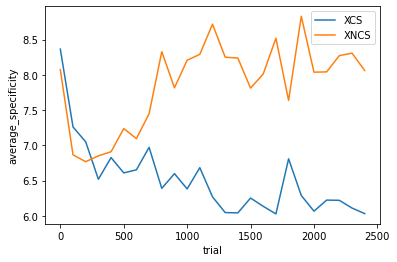

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])



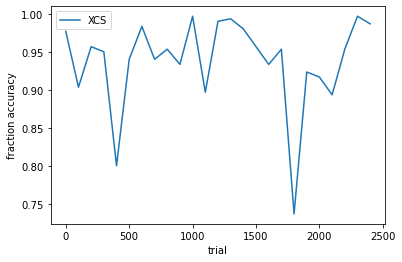

In [7]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

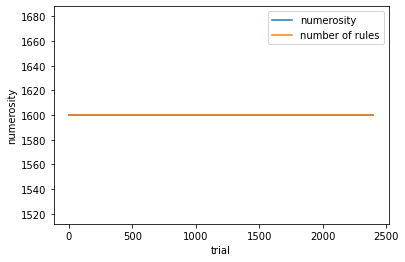

In [8]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

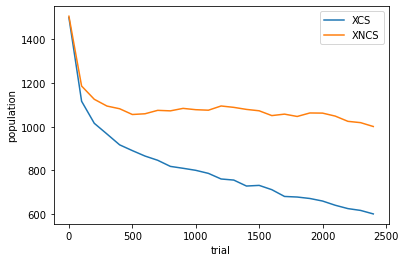

In [9]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

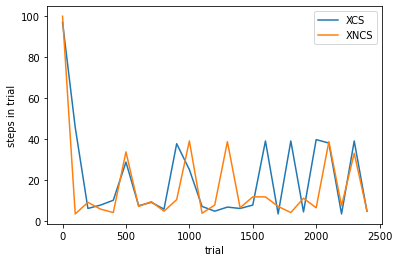

In [10]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])

In [11]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_other"])/number_of_experiments)

173.99999999999997
139.33333333333334
